##                                                 Course - Healthcare Analytics
##                                                 Homework# -  I
##                                                 Author : Harinadh Appidi 

#### Abstract :
    Heart Disease Data Set contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The “goal” field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). Therefore, this problem can be modelled as binary classification problem.

#### Dataset Link :
    https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Main import *
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('processed.cleveland.data', header=None)
h1 = HeartDiseasePrediction(data)


In [3]:
# Naming the columns and labeling categorical and numerical columns
h1.prepare_data()


In [4]:
h1.data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_failure
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<AxesSubplot:xlabel='heart_failure', ylabel='count'>

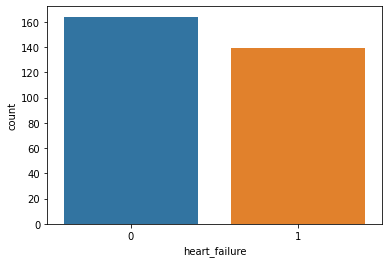

In [5]:
data = h1.data
sns.countplot(data.heart_failure)

Describing data for numerical features to identify different statistical values 

In [6]:
data.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


##### TASK I #####

Removing the rows having missing data

In [7]:
print(h1.data.shape)
h1.filter_missing_data()
print(h1.data.shape)


(303, 14)
(297, 14)


##### TASK II #####

- Split Data into feature columns and target vector
- One hot encoding categorical variables
- Standardize all feature columns with mean 0 and standard deviation of 1

In [8]:
h1.data_split()
h1.standardize_data()
h1.X.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,-0.721976,-0.691095,0.691095,3.451528,-0.444500,...,-0.116841,1.016979,0.696419,-0.696419,-0.937948,-0.925338,3.625308,-1.110443,3.937004,-0.794901
1,1.378929,1.596266,0.744555,-1.816334,0.381773,2.478425,-0.691095,0.691095,-0.289727,-0.444500,...,-0.116841,1.016979,-1.435916,1.435916,-0.937948,1.080686,-0.275839,0.900542,-0.254000,-0.794901
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1.411625,-0.691095,0.691095,-0.289727,-0.444500,...,-0.116841,1.016979,-1.435916,1.435916,-0.937948,1.080686,-0.275839,-1.110443,-0.254000,1.258018
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,-0.721976,-0.691095,0.691095,-0.289727,-0.444500,...,-0.116841,-0.983304,0.696419,-0.696419,-0.937948,-0.925338,3.625308,0.900542,-0.254000,-0.794901
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,-0.721976,1.446980,-1.446980,-0.289727,2.249717,...,-0.116841,1.016979,0.696419,-0.696419,1.066157,-0.925338,-0.275839,0.900542,-0.254000,-0.794901


#### TASK III ####

- Trained the model with Logistic regression Algorithm and 10 folds cross validation

In [9]:
h1.train_model(model_name= 'LR', n_folds= 10)

******************** Logistic Regression *****************
########### Mean CV Accuracy ######## --  0.8518390804597702
###### Mean CV Specificity ####### --  0.9056179523091286
###### Mean CV Sensitivity ####### --  0.7846214896214896
########## Mean CV G-Mean ####### --  0.8405412975755369
######### Mean CV AUC of ROC curve ######## --  0.9011041352438411


- Trained the model with SVM Algorithm and 10 folds CV along with Grid search for best hyperparameter selection

In [10]:
h1.train_model(model_name='SVM', n_folds=10)

******************** Support Vector Machines *****************
########### Mean CV Accuracy ######## --  0.8451724137931036
###### Mean CV Specificity ####### --  0.8880584284996049
###### Mean CV Sensitivity ####### --  0.7950976800976802
########## Mean CV G-Mean ####### --  0.8386162340774626
######### Mean CV AUC of ROC curve ######## --  0.8986019356460533


#### TASK IV ####

Run the model based on sequential feature selection mechanism for both Logistic Regression and SVM

In [11]:
h1.feature_selection()

[ 1  3  4  5  6  7  8 10 11 19 20 22 24]
******************** Support Vector Machines *****************
########### Mean CV Accuracy ######## --  0.8518390804597702
###### Mean CV Specificity ####### --  0.8896457300869065
###### Mean CV Sensitivity ####### --  0.8096214896214896
########## Mean CV G-Mean ####### --  0.8463581880762705
######### Mean CV AUC of ROC curve ######## --  0.9021881688572865
******************** Logistic Regression *****************
########### Mean CV Accuracy ######## --  0.8551724137931036
###### Mean CV Specificity ####### --  0.9007568411980176
###### Mean CV Sensitivity ####### --  0.8012881562881564
########## Mean CV G-Mean ####### --  0.8472326870100995
######### Mean CV AUC of ROC curve ######## --  0.9128235264191146


#### TASK V ####

1. In Part 3 and Part 4 Logistic Regression Performed better than SVM
2. SVM and Logistic Regression in part 4 with feature selection of 10 most important features is better than part 3 across all performance metrics.